# Final Project Submission

In [467]:
# Please fill out:
# * Student name: Sabina Bains
# * Student pace: Self Paced
# * Scheduled project review date / time: ??????
# * Instructor name: Claude Fried

Business Problem:

King County Healing Association (KCHA) has reached out to you to help get previously incarcerated individuals get back on their feet.

KCHA is an established nonprofit organization that has a variety of successful initiatives such as rehabilitation centers, medical assistance, career services, and temporary housing for those re-entering their communities. The organization now wants to expand on their housing opportunities by rolling out a new service to help those who are prepared to transition into a permanent residence.  

KCHA plans to work with aspiring homeowners in their program towards choosing a quality, yet affordable home. From there, KCHA purchases the home and rents it out to the tenant until fully paid off. There are multiple conditions in the contract, including having held a full time job for at least a year, having a household salary that is at least 30% of the house price, and choosing a home in the same zipcode as their parole officer, if applicable.

KCHA doesn't plan to launch this service for another 3 years, however they first need to determine whether their budget can even cover this program. To do this, they want us to create a model (similar to Zillow's 'Zestimates') that can predict the price for homes of various size and location that are not yet on the market

------

Business Problem:

King County Homeless Association (KCHA) has reached out to you to help get those in need back their feet. 

KCHA is an established nonprofit organization that has a variety of successful initiatives such as rehabilitation centers, medical assistance, childcare, and career services.

They also offer emergency shelters for those sleeping in spaces not habitable for humans, as well as temporary housing for multiple families to occupy for a flexible time period. The organization now wants to expand on their housing opportunities by rolling out a new service to help those who are prepared to transition into a permanent residence. 

KCHA plans to work with aspiring homeowners in the program towards choosing a quality, yet affordable home. From there, KCHA purchases the home and rents it out to the tenant until fully paid off. There are multiple conditions in the contract, including having held a full time job for at least a year, having a household salary that is at least 30% of the house price, and choosing a home in the same zipcode as their place of residence. 

KCHA doesn't plan to launch this service for another 3 years, however they first need to determine whether their donations can even cover this program. To do this, they want us to create a model (similar to Zillow's 'Zestimates') that can predict the price the 6 families they estimate will use their service once it launches. 




### Importing Packages and Reading in Data

In [468]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import numpy as np
# plt.style.use('ggplot')

style.use('dark_background')
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

In [469]:
# importing King County House Sales dataset
df = pd.read_csv('data/kc_house_data.csv')

In [470]:
# Variable Definitions
'''
id : A notation for a house
date: Date house was sold
price: Price is prediction target
bedrooms: Number of bedrooms
bathrooms: Number of bathrooms
sqft_living: Square footage of the home
sqft_lot: Square footage of the lot
floors :Total floors (levels) in house
waterfront :House which has a view to a waterfront
view: Has been viewed
condition :How good the condition is overall
grade: overall grade given to the housing unit, based on King County grading system
sqft_above : Square footage of house apart from basement
sqft_basement: Square footage of the basement
yr_built : Built Year
yr_renovated : Year when house was renovated
zipcode: Zip code
lat: Latitude coordinate
long: Longitude coordinate
sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
sqft_lot15 : LotSize area in 2015(implies-- some renovations
'''
print('seems we would be interested in zipcode, bedrooms, bathrooms, sqft_living, condition/grade')

seems we would be interested in zipcode, bedrooms, bathrooms, sqft_living, condition/grade


# Data Exploration

### Handling N/A's

In [471]:
df.describe()
len(df)

print('''
This data set is comprised of {} rows.
N/A's:
{}
'''.format(len(df),df.isna().sum()))


This data set is comprised of 21597 rows.
N/A's:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64



In [472]:
## checking waterfront column
print('''Unique values are {} removing waterfront N/A's would remove {} of the overall dataset. We can drop this column from the dataset since we 
are looking at affordable homes, and a waterfront property is not a priority'''
      .format(df.waterfront.unique(), '{:0.1%}'.format(df.waterfront.isna().sum() / len(df))))

Unique values are [nan  0.  1.] removing waterfront N/A's would remove 11.0% of the overall dataset. We can drop this column from the dataset since we 
are looking at affordable homes, and a waterfront property is not a priority


In [473]:
## dropping waterfront columns
df.drop('waterfront',axis=1,inplace=True)

In [475]:
## checking view column
print('''Unique values are {} removing view N/A's would remove {} of the overall dataset. We can just drop the column'''
      .format(df.view.unique(), '{:0.1%}'.format(df.view.isna().sum() / len(df))))

AttributeError: 'DataFrame' object has no attribute 'view'

In [474]:
## dropping view columns
df.drop('view',axis=1,inplace=True)

In [476]:
## checking yr_renovated column
print('''Unique values are {} removing view N/A's would remove {} of the overall dataset. Let's assume n/a means no renovations.'''
      .format(df.yr_renovated.unique(), '{:0.1%}'.format(df.yr_renovated.isna().sum() / len(df))))

Unique values are [   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.] removing view N/A's would remove 17.8% of the overall dataset. Let's assume n/a means no renovations.


In [479]:
## filling yr_renovated NAs
df.yr_renovated.fillna(0,inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [480]:
## Deleting rows with price > 1MM , as KCHA will not purchase above that price
df = df.loc[df.price < 1000000]

In [481]:
# Investigating Duplicate ID's

In [484]:
dup_id_list = df.loc[df.id.duplicated()]['id'].to_list()
dup_id_df = df.loc[df.id.isin(dup_id_list)]
dup_id_df_sort = dup_id_df.sort_values(by=['id','date'],ascending = False)
# Looks like these ID's are for updates in price. Keep them.

### Handling Data Types

In [485]:
df.info()

print('''-------------- NOTES: ---------------
id should be str
date should be datetime (?)
sqft_basement should be int or float
yr_built should be str? - NO FOR NOW
yr_renovated should be str? - NO FOR NOW
zipcode should be str
waterfront - str
''')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20107 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20107 non-null  int64  
 1   date           20107 non-null  object 
 2   price          20107 non-null  float64
 3   bedrooms       20107 non-null  int64  
 4   bathrooms      20107 non-null  float64
 5   sqft_living    20107 non-null  int64  
 6   sqft_lot       20107 non-null  int64  
 7   floors         20107 non-null  float64
 8   condition      20107 non-null  int64  
 9   grade          20107 non-null  int64  
 10  sqft_above     20107 non-null  int64  
 11  sqft_basement  20107 non-null  object 
 12  yr_built       20107 non-null  int64  
 13  yr_renovated   20107 non-null  float64
 14  zipcode        20107 non-null  int64  
 15  lat            20107 non-null  float64
 16  long           20107 non-null  float64
 17  sqft_living15  20107 non-null  int64  
 18  sqft_l

In [431]:
# 'id' - str
# 'date' - date
# 'price' - int
# 'bedrooms' - int
# 'bathrooms' - float
# 'sqft_living' - int
# 'sqft_lot' - int
# 'floors' - float
# 'view' - int
# 'condition' - int
# 'grade' - int
# 'sqft_above' - int
# 'sqft_basement' - int
# 'yr_built' - int
# 'yr_renovated' - int
# 'zipcode' - str
# 'lat' - float
# 'long' - float
# 'sqft_living15' - int
# 'sqft_lot15' - int

In [486]:
## Removing sqft_basement with "?" and changing dtype to int
df = df.loc[~(df.sqft_basement == '?')]

In [487]:
# change to str type
for col in ['id', 'zipcode']:
    df[col] = df[col].astype(str)

In [490]:
# change to int type
for col in ['id', 'price', 'bedrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']:
    df[col] = df[col].astype(float).astype(int)

In [491]:
df.info()
print('''------- notes: ---------
Everything looks good now''')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19683 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19683 non-null  int64  
 1   date           19683 non-null  object 
 2   price          19683 non-null  int64  
 3   bedrooms       19683 non-null  int64  
 4   bathrooms      19683 non-null  float64
 5   sqft_living    19683 non-null  int64  
 6   sqft_lot       19683 non-null  int64  
 7   floors         19683 non-null  float64
 8   condition      19683 non-null  int64  
 9   grade          19683 non-null  int64  
 10  sqft_above     19683 non-null  int64  
 11  sqft_basement  19683 non-null  int64  
 12  yr_built       19683 non-null  int64  
 13  yr_renovated   19683 non-null  int64  
 14  zipcode        19683 non-null  object 
 15  lat            19683 non-null  float64
 16  long           19683 non-null  float64
 17  sqft_living15  19683 non-null  int64  
 18  sqft_l

In [497]:
print('not interested in renovating details so will drop from our columns, as well as lat / long, ')

not interested in renovating details so will drop from our columns, as well as lat / long, 


In [498]:
#SPLITTING INTO CONTINOUS AND DISCRETE VARIABLES
cont = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]
cat = df[['zipcode']]

In [499]:
# removing outlier with 33 bedrooms
cont = cont.loc[~(cont.bedrooms == 33)]

#### CHECKING LINEARITY OF PREDICTORS

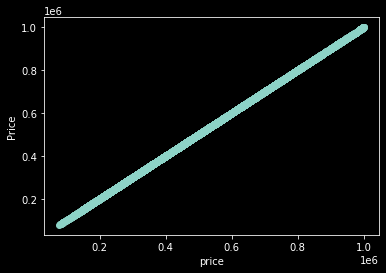

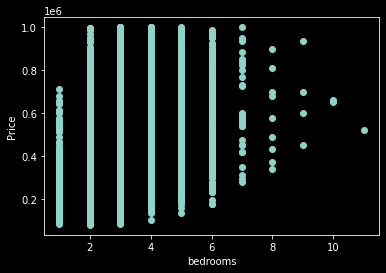

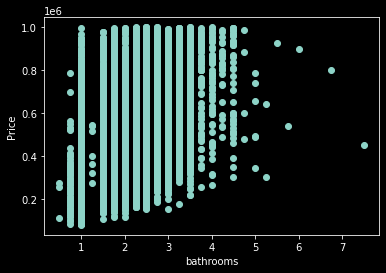

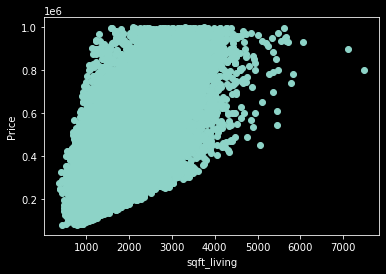

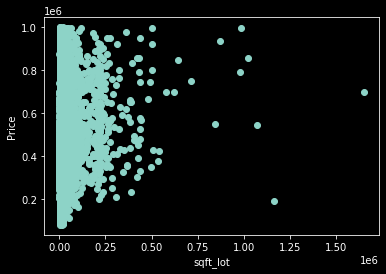

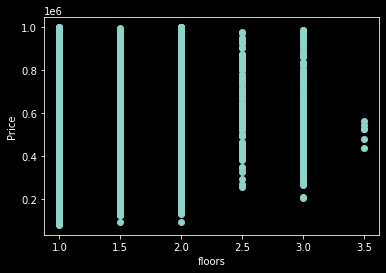

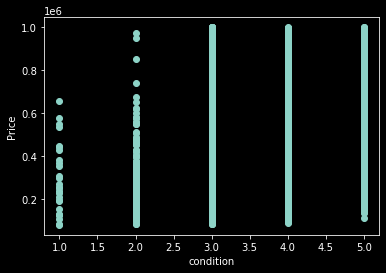

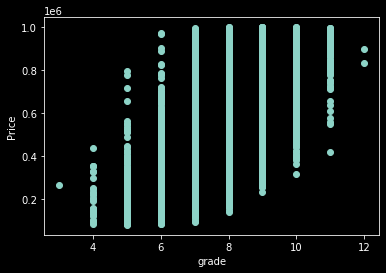

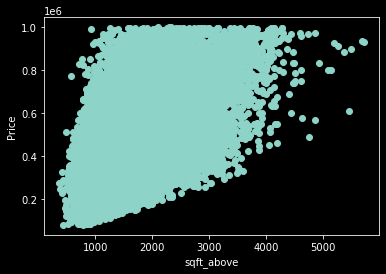

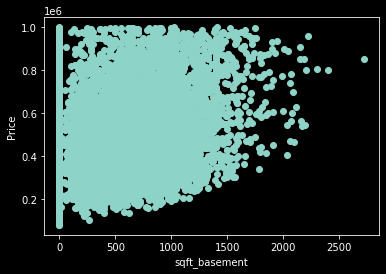

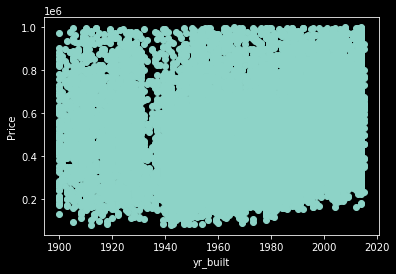

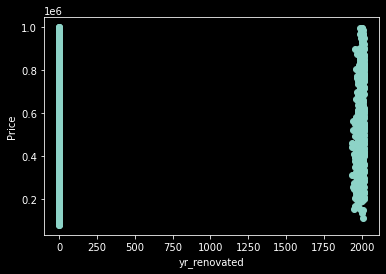


----------- NOTES: ------------
sqft_lot is not linear
sqft_basement seems not linear (should be Y/N variable?)
yr_built is not linear
yr_renovated is not linear (should be Y/N variable?)
lat is not linear
long is not linear
sqft_lot15 is not linear



In [500]:
# #Checking Linearity of Predictors to Dependent variable
for col in cont.columns:
    plt.scatter(cont[col],cont['price'])
    plt.xlabel(col)
    plt.ylabel('Price')
#     plt.xlim([25, 50])
    plt.show()
    
print('''
----------- NOTES: ------------
sqft_lot is not linear
sqft_basement seems not linear (should be Y/N variable?)
yr_built is not linear
yr_renovated is not linear (should be Y/N variable?)
lat is not linear
long is not linear
sqft_lot15 is not linear
''')

### CHECKING 4 ASSUMPTIONS OF MULTIPLE LINEAR REGRESSION

In [501]:
## Turning sqft_basement and yr_renovated into binary variables
def make_binary(row):
    if row > 0:
        return 1
    if row == 0:
        return 0
    
df['has_basement'] = df['sqft_basement'].apply(make_binary)
df['renovated'] = df['yr_renovated'].apply(make_binary)

In [503]:
## dropping vars that do not pass assumption, and adding new dummy vars into x_cat
cont.drop(['sqft_lot','sqft_basement','yr_renovated'],axis=1,inplace=True)
cat[['has_basement','renovated']] = df[['has_basement','renovated']]

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


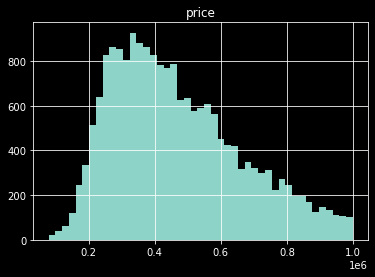

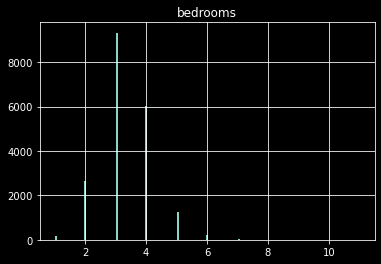

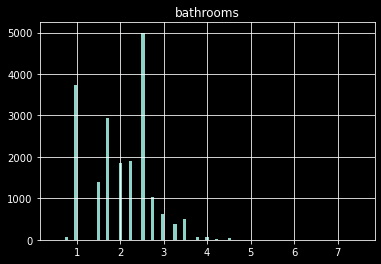

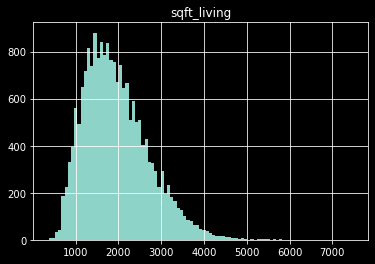

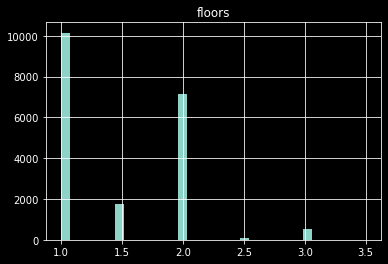

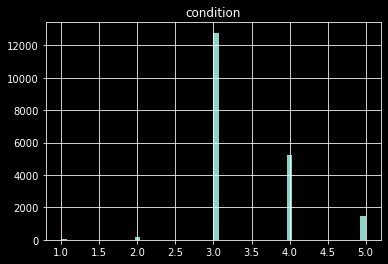

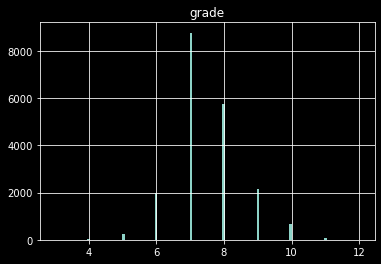

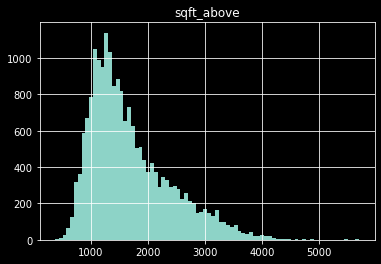

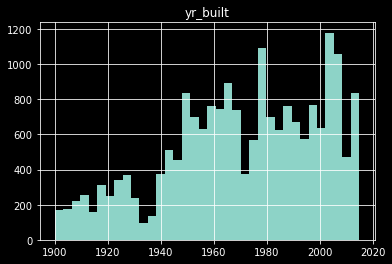

In [507]:
## Checking Normality of Variables ( Not an assumption, but just for reference )
## Variables seem skewed

for col in cont.columns:
    cont.hist(col,bins='auto')

#### CHECKING FOR NORMAL DISTRIBUTION OF RESIDUALS AND HOMOSCEDASTICITY

bedrooms [('Jarque-Bera', 1120.8840582738123), ('Prob', 4.009768679085295e-244), ('Skew', 0.5629293929964159), ('Kurtosis', 2.684984332658935)]
bathrooms [('Jarque-Bera', 1108.2503801314388), ('Prob', 2.2206886396995917e-241), ('Skew', 0.5743118115743101), ('Kurtosis', 2.820971259195855)]
sqft_living [('Jarque-Bera', 722.7302585214504), ('Prob', 1.1511141959144137e-157), ('Skew', 0.46806636351164416), ('Kurtosis', 2.92968414420381)]
floors [('Jarque-Bera', 1323.6263529042524), ('Prob', 3.786076770908354e-288), ('Skew', 0.6172965756388151), ('Kurtosis', 2.7003431894469556)]
condition [('Jarque-Bera', 1352.376296159974), ('Prob', 2.1638071946277145e-294), ('Skew', 0.6211101150037045), ('Kurtosis', 2.674483952586004)]
grade [('Jarque-Bera', 1018.7496701016344), ('Prob', 6.043936837208517e-222), ('Skew', 0.5525042676434662), ('Kurtosis', 3.145628082275768)]
sqft_above [('Jarque-Bera', 1006.8586335009414), ('Prob', 2.3090094319447268e-219), ('Skew', 0.5499100998201988), ('Kurtosis', 2.86528

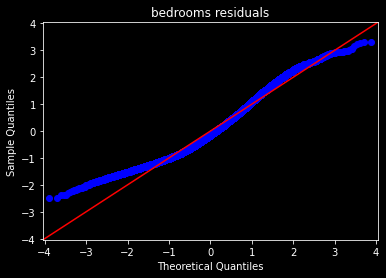

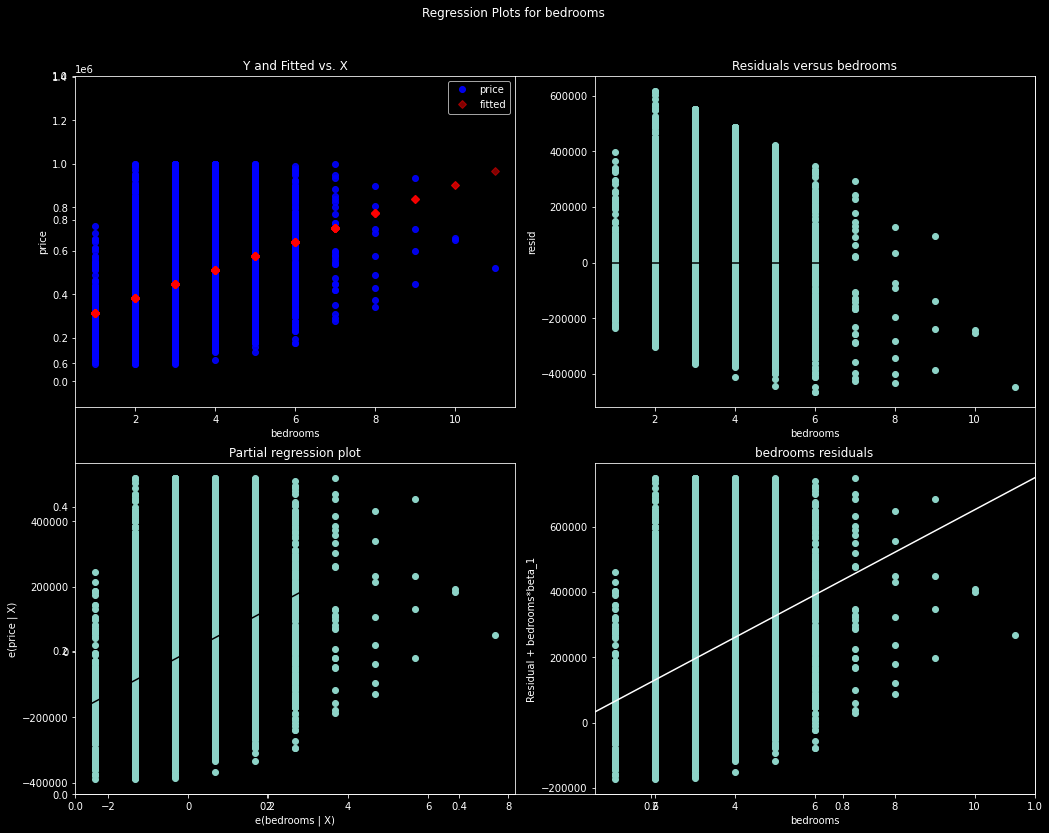

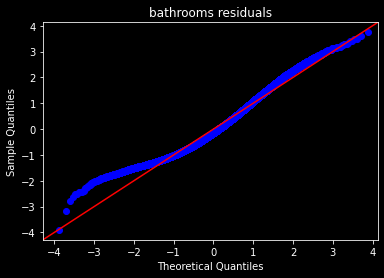

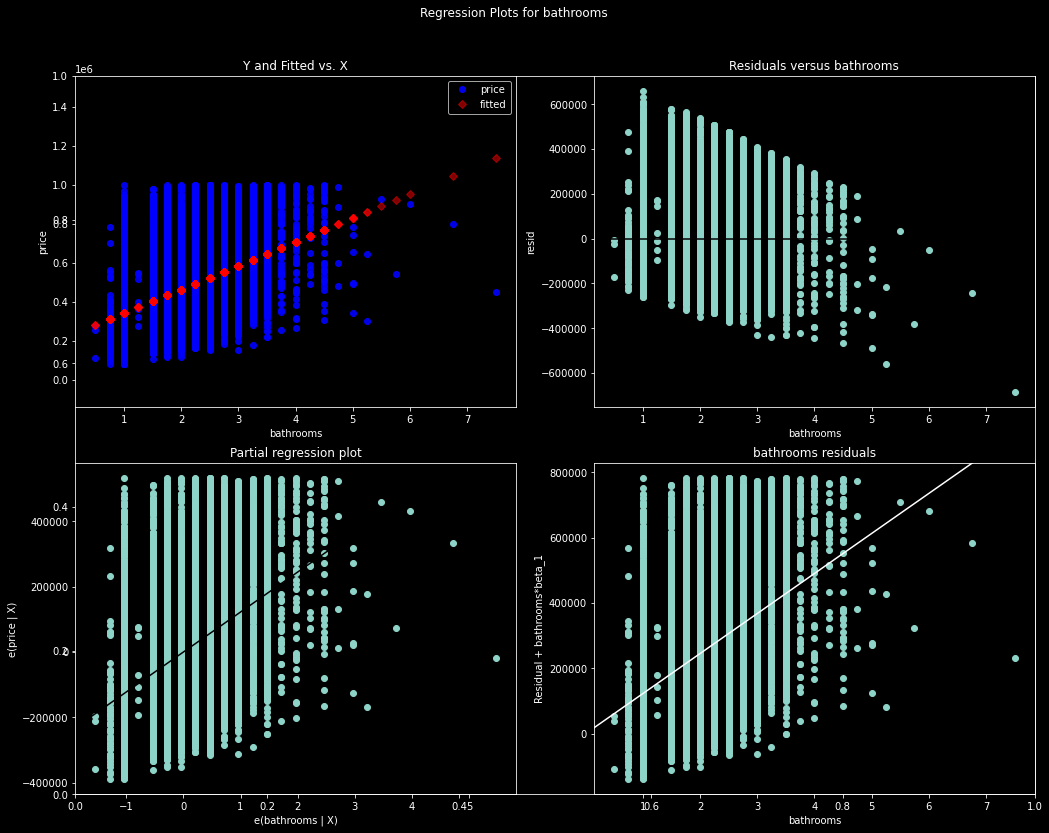

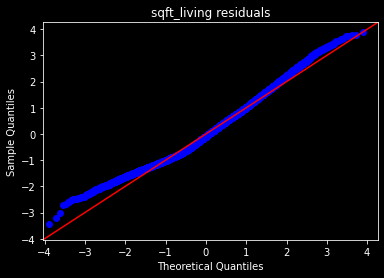

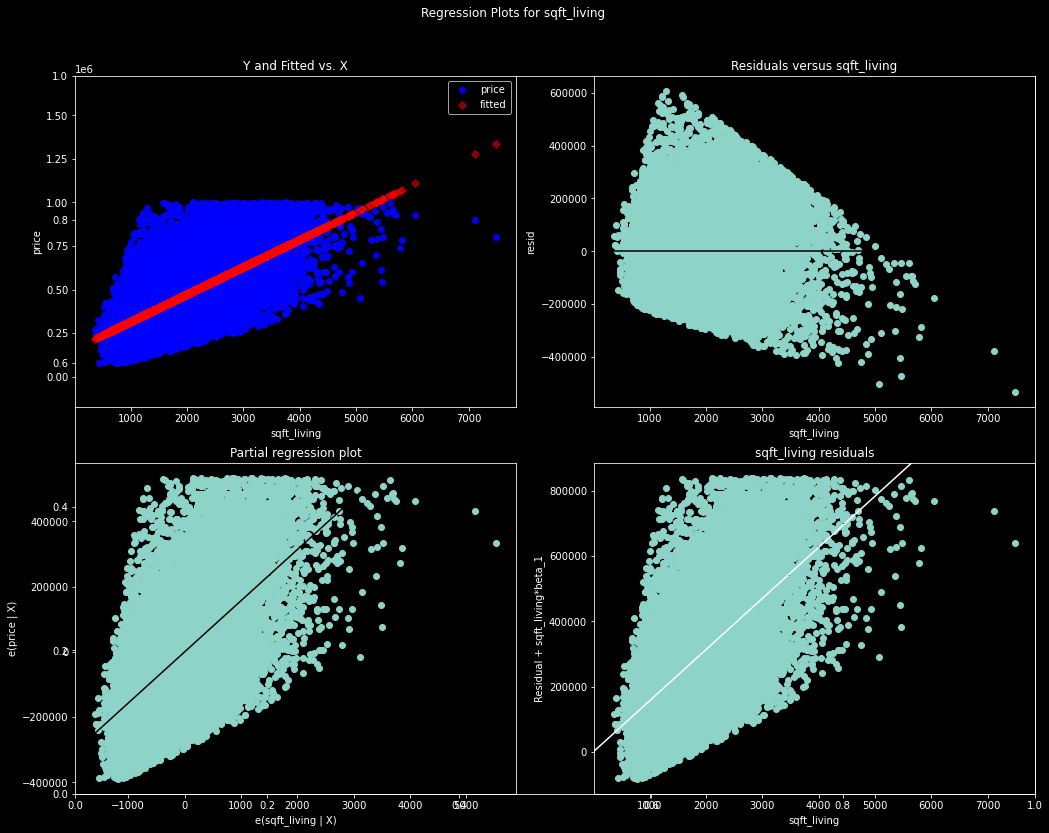

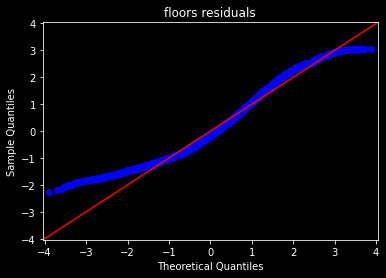

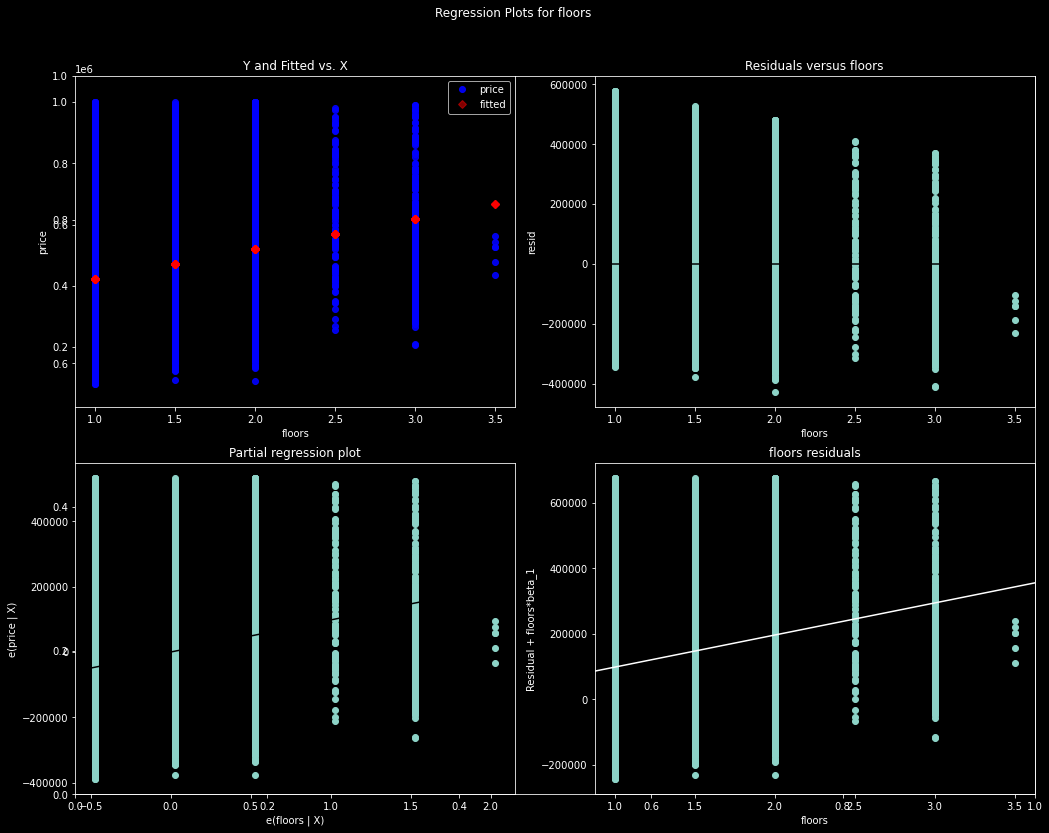

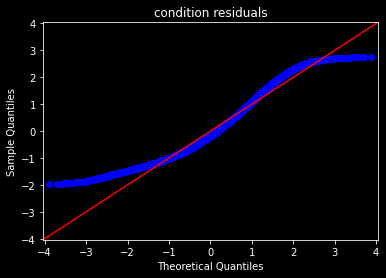

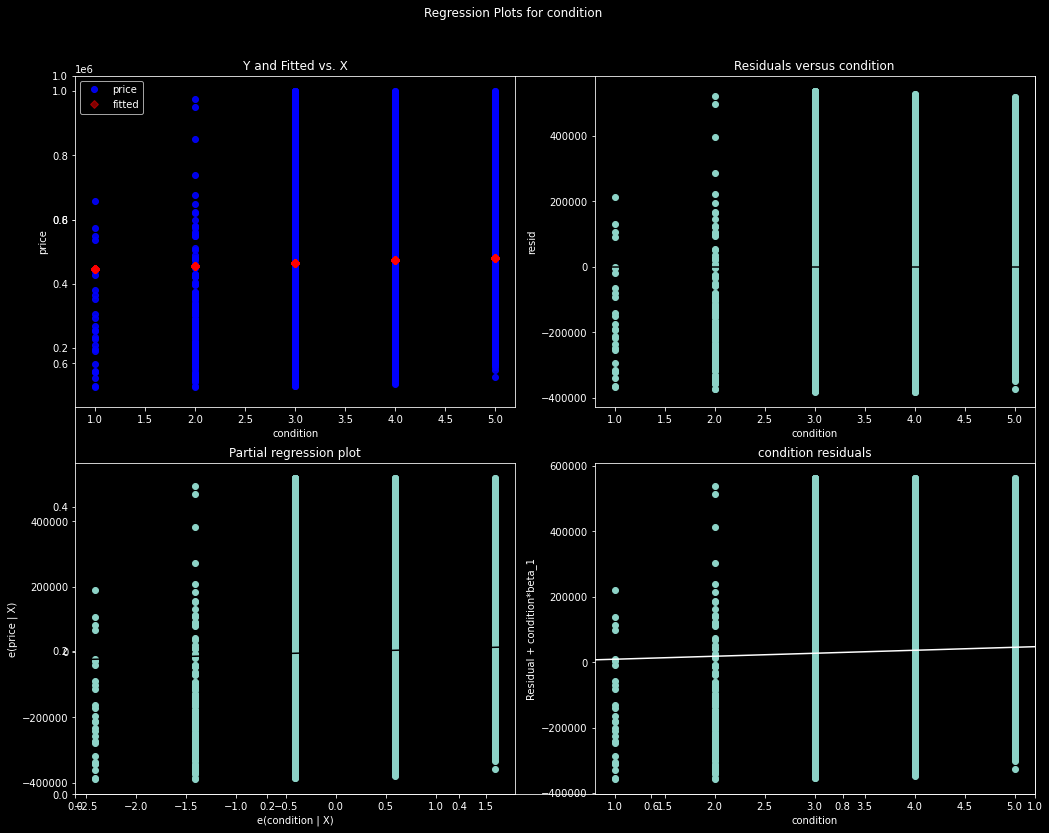

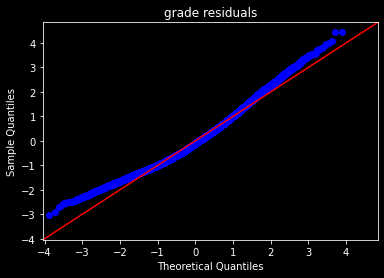

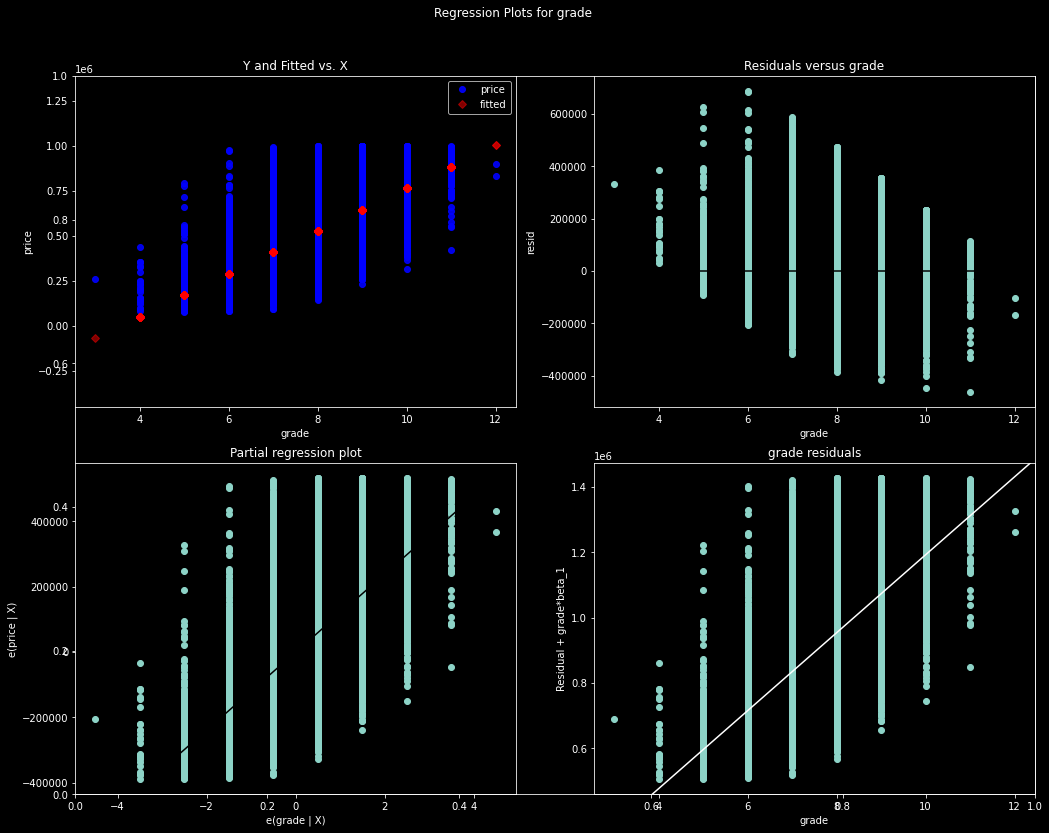

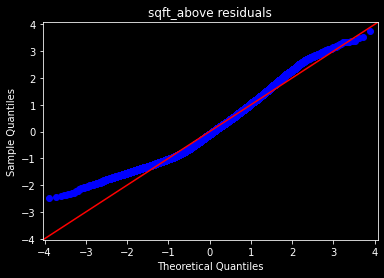

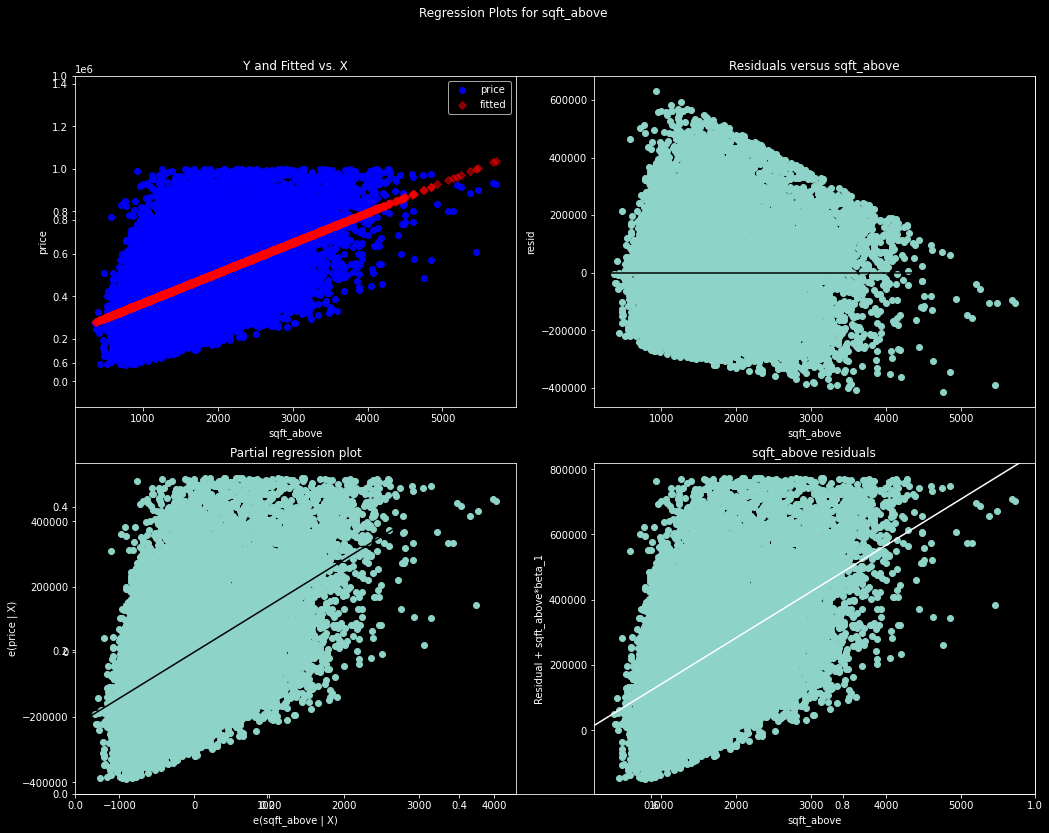

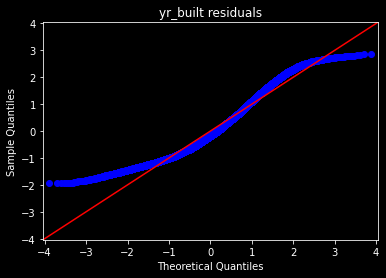

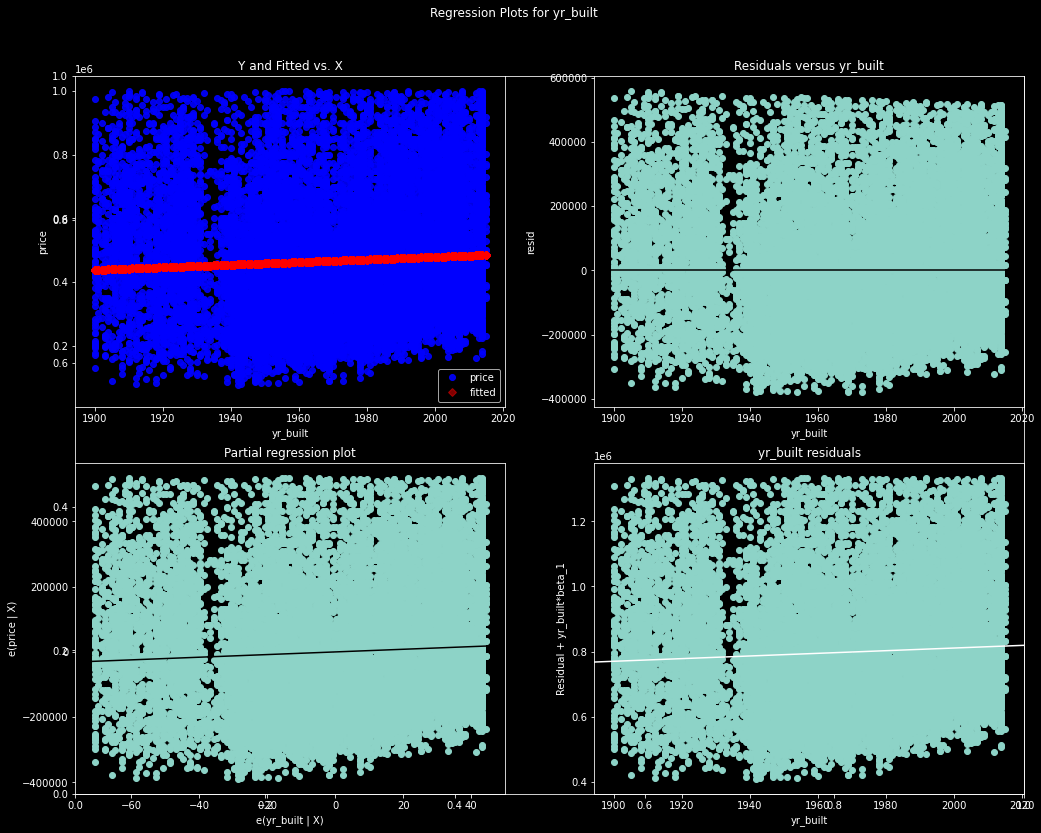

In [508]:
for col in cont.drop('price',axis=1):
    f = 'price ~ '+col
    model = smf.ols(formula=f, data=cont).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(col+' residuals')
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.title(col+' residuals')
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print(col, list(zip(name, test)))
    
print('''
--------- NOTES: ----------
None of these variables have normally distributed residuals.
    JB values are relatively large. x
    All values have a slight positive skew
    All values have Kurtosis values ~3, implying normal tails. 
None of these variables are Homoscedastic

*****We will have to transform this data*****
''')

In [ ]:
## drop year built, condition, floors

##### TRANSFORMING CONTINUOUS VARIABLES

In [509]:
df_corr = cont.corr().abs().stack().reset_index().sort_values(by=0,ascending=False)
df_corr.loc[(df_corr['level_0'] == 'price') & (df_corr[0] != 1)]

,level_0,level_1,0
6,price,grade,0.616879
3,price,sqft_living,0.604522
7,price,sqft_above,0.515814
2,price,bathrooms,0.439215
1,price,bedrooms,0.293125
4,price,floors,0.268951
8,price,yr_built,0.060251
5,price,condition,0.030149


In [322]:
# cont_log = pd.DataFrame()
# for col in cont:
#     cont_log[col+'_log'] = cont[col].map(lambda x: np.log(x))

bedrooms_log [('Jarque-Bera', 96.92321039381982), ('Prob', 8.982397680508116e-22), ('Skew', -0.009964904534288341), ('Kurtosis', 2.6642035613994155)]
bathrooms_log [('Jarque-Bera', 146.0757960608352), ('Prob', 1.9056534066613475e-32), ('Skew', 0.040999316285579755), ('Kurtosis', 2.5952561277116253)]
sqft_living_log [('Jarque-Bera', 161.5057057980237), ('Prob', 8.50122651334065e-36), ('Skew', -0.032561944368482004), ('Kurtosis', 2.5706814081227134)]
floors_log [('Jarque-Bera', 75.16654729551897), ('Prob', 4.7620246913893594e-17), ('Skew', 0.038900123531717894), ('Kurtosis', 2.714162672631058)]
condition_log [('Jarque-Bera', 54.2283598843765), ('Prob', 1.6767227995505121e-12), ('Skew', 0.0060707929789004895), ('Kurtosis', 2.748676687780462)]
grade_log [('Jarque-Bera', 5.399865154936747), ('Prob', 0.0672100440583127), ('Skew', 0.030200374656335845), ('Kurtosis', 2.948463470195934)]
sqft_above_log [('Jarque-Bera', 160.81604276868637), ('Prob', 1.200162387371714e-35), ('Skew', -0.0267780258

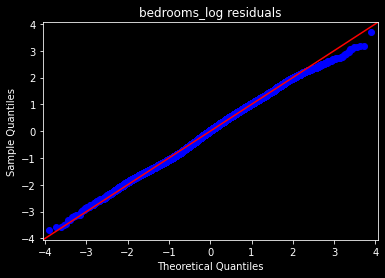

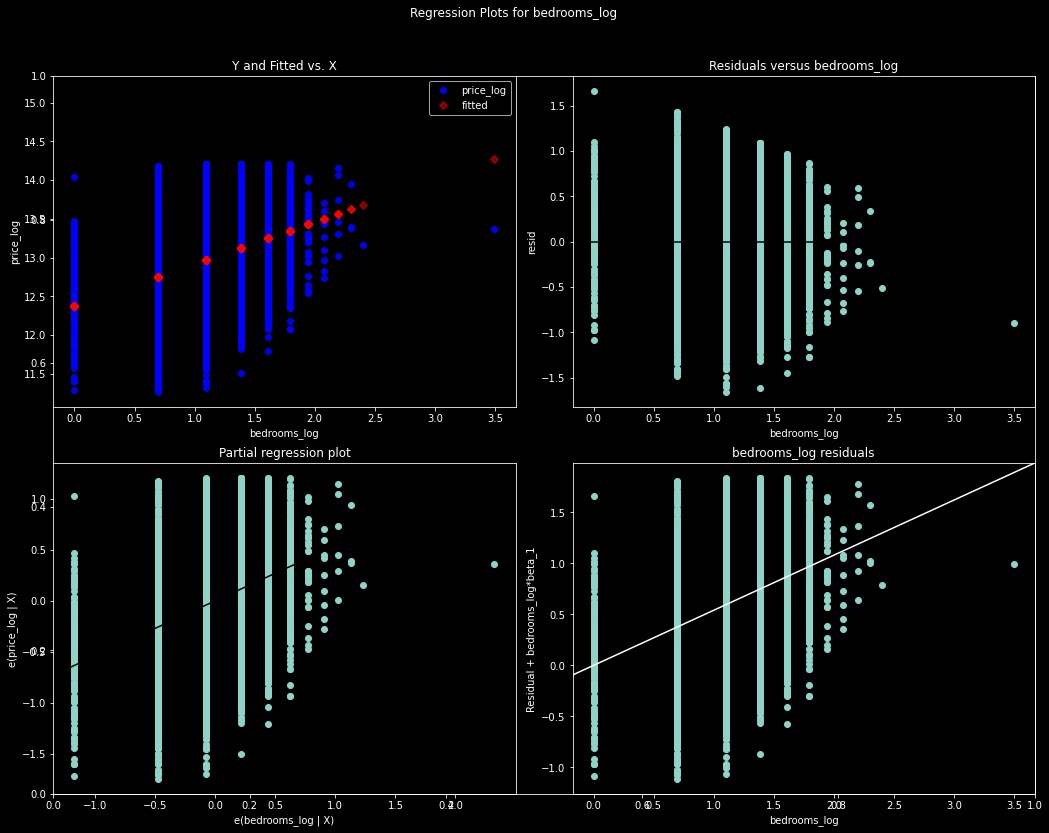

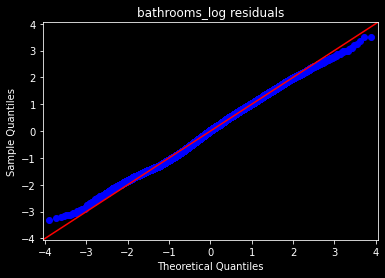

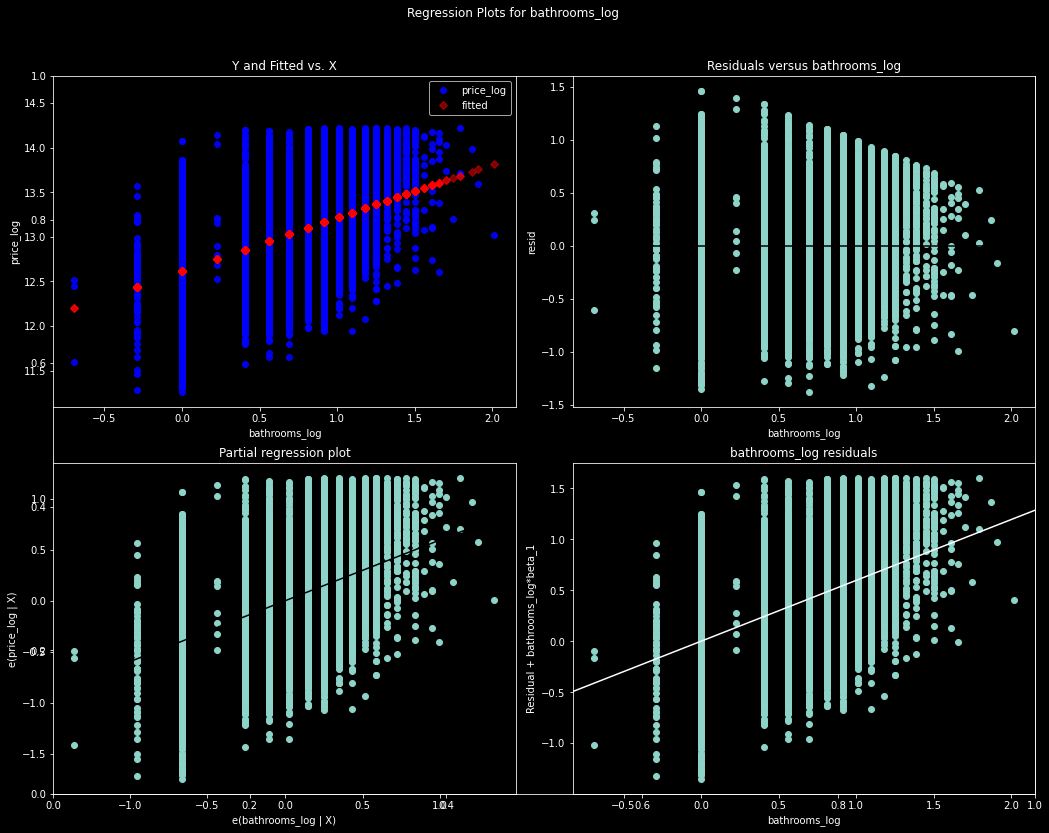

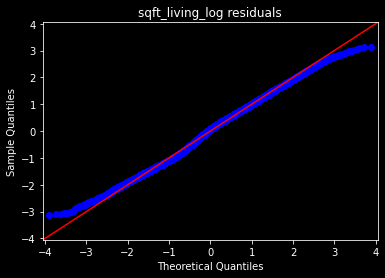

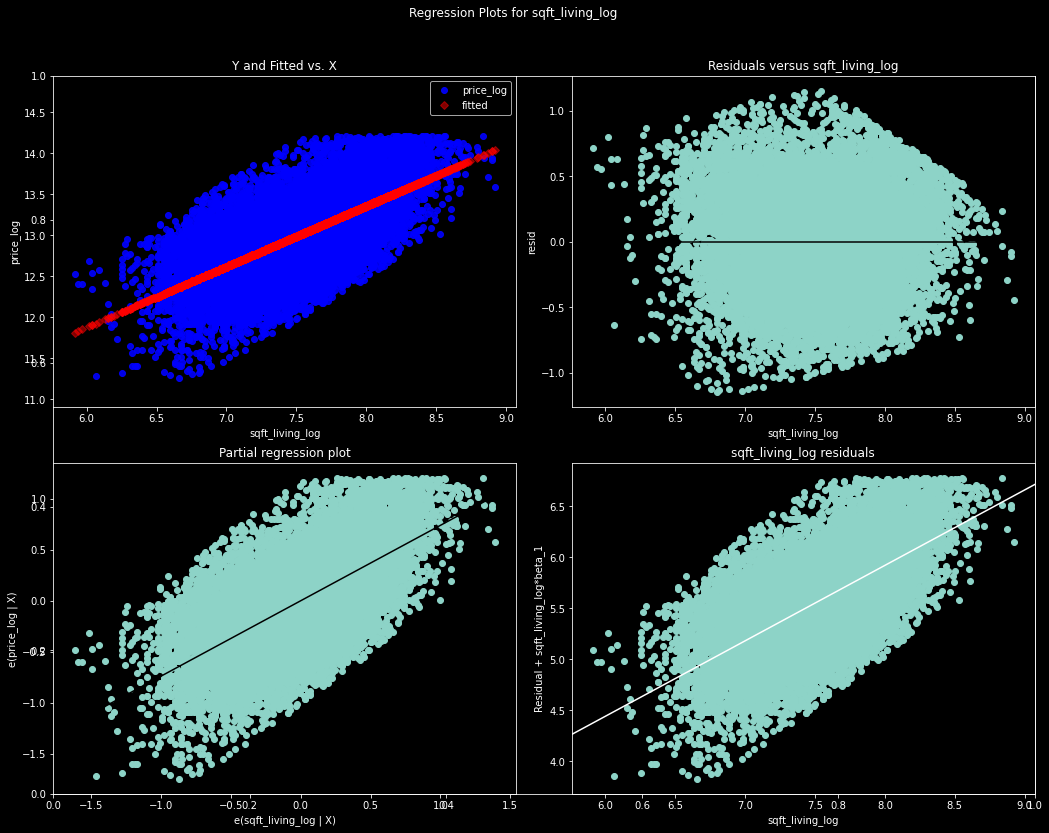

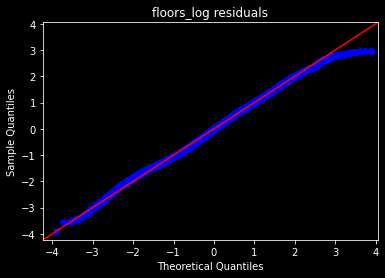

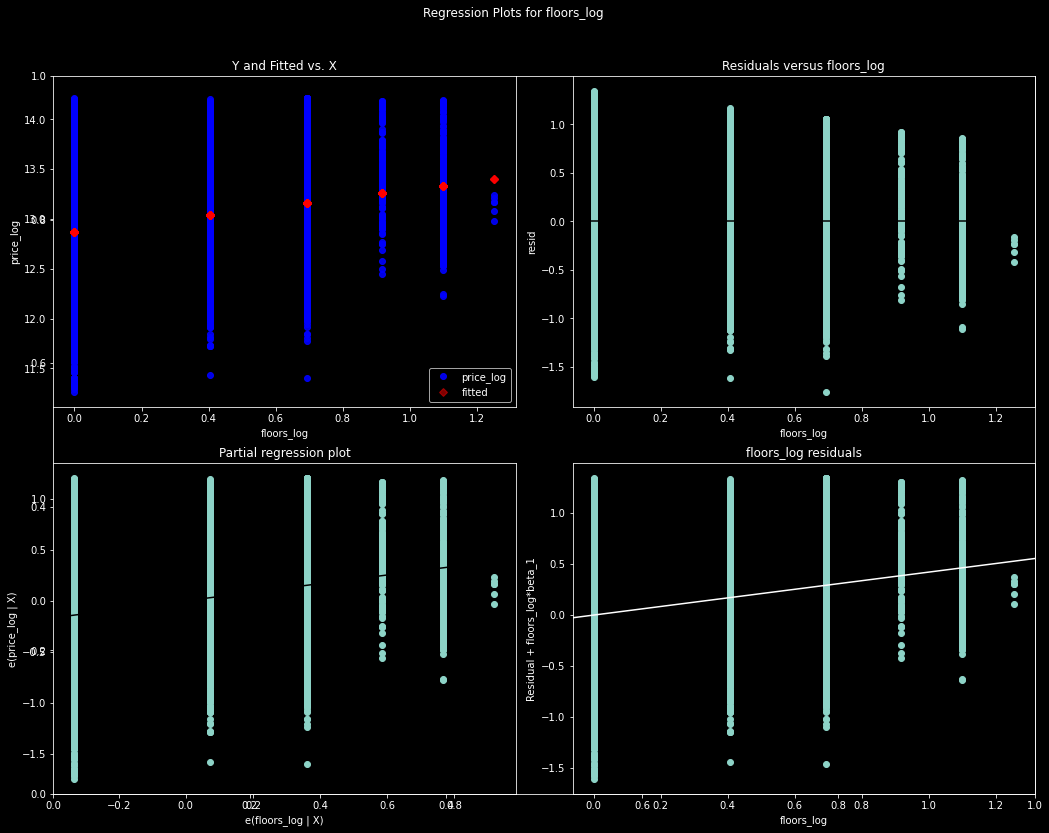

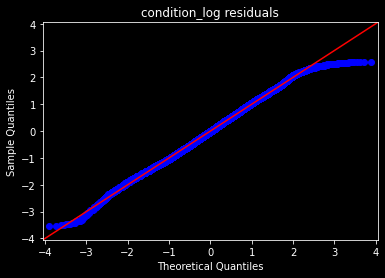

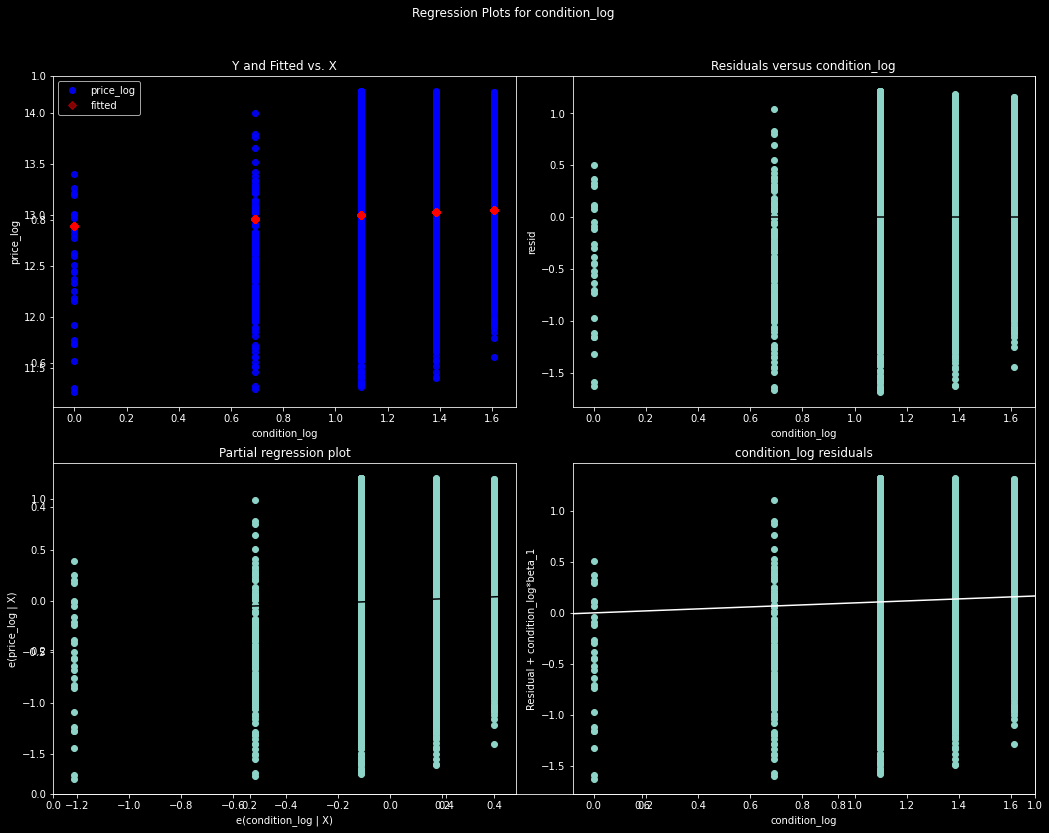

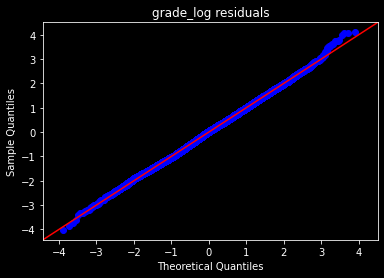

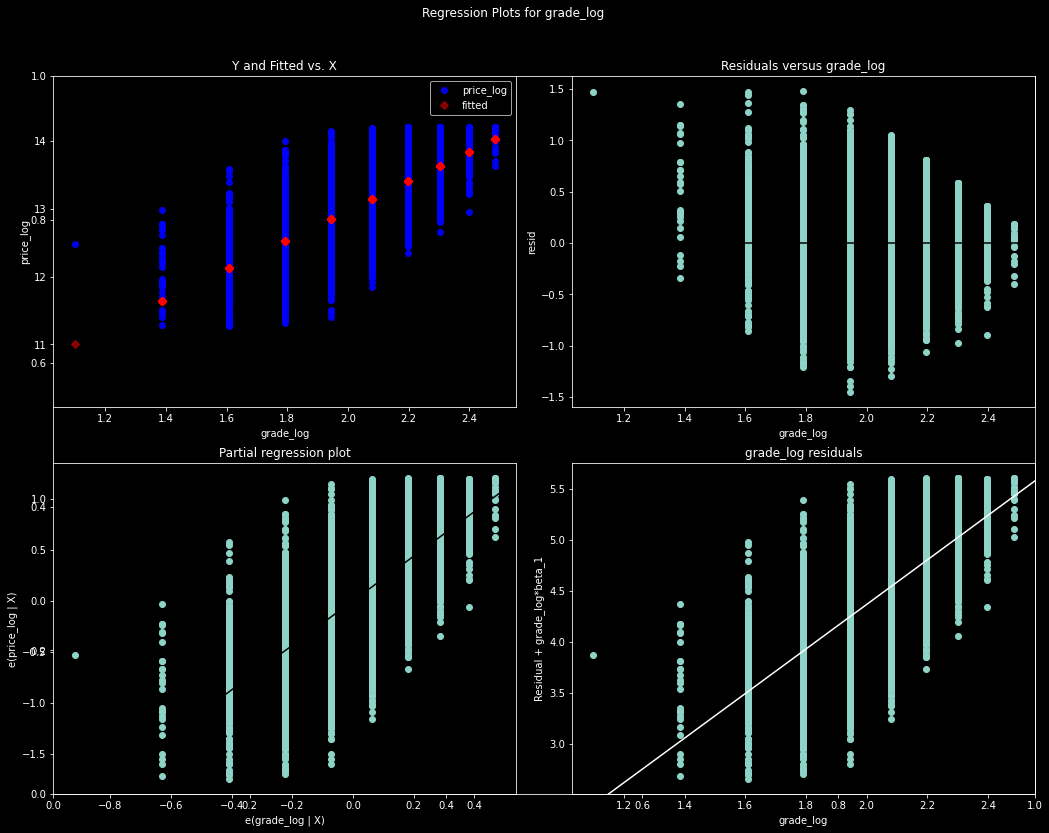

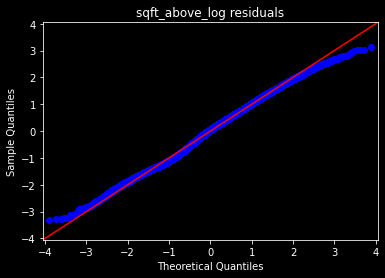

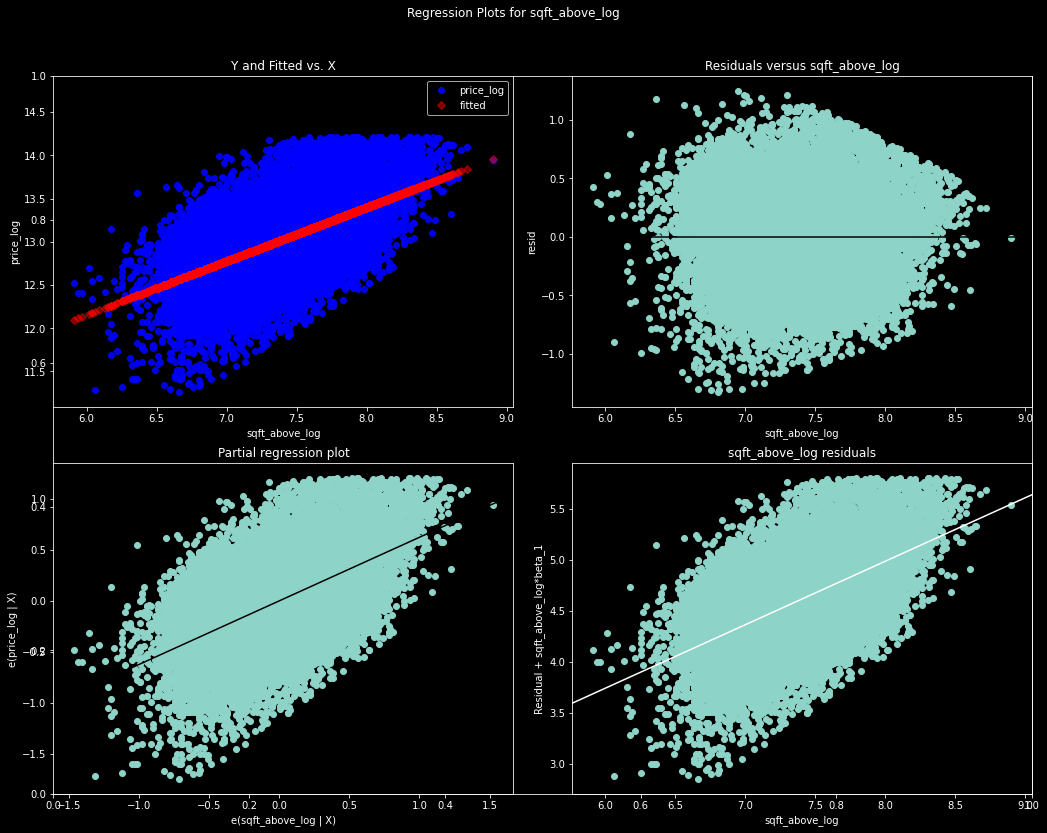

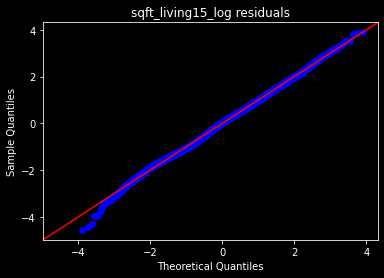

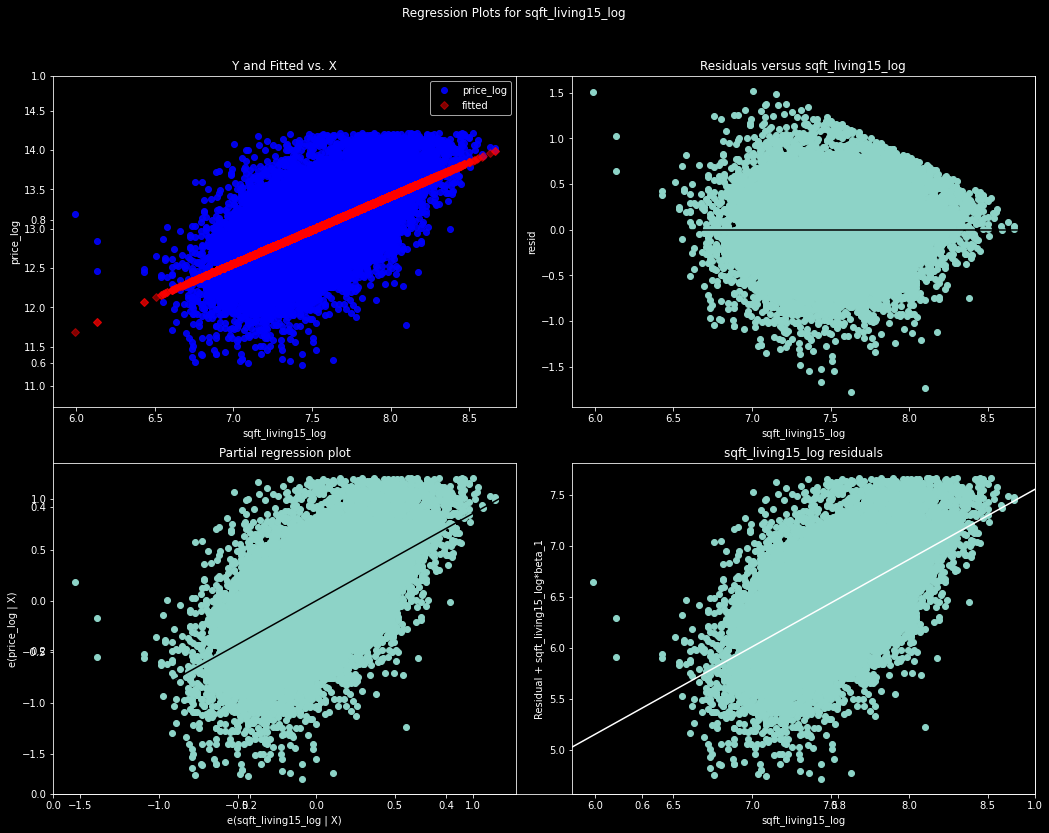

In [323]:
for col in cont_log.drop('price_log',axis=1):
    f = 'price_log ~ '+col
    model = smf.ols(formula=f, data=cont_log).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title(col+' residuals')
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.title(col+' residuals')
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print(col, list(zip(name, test)))
    
print('''
--------- NOTES: ----------
Variable residuals are more distributed now. 
    JB values are much lower now
    All values have a skew ~ 0 
    All values have a high Kurtosis ~ 3 which implies normal 
Variables are heteroscedastic now.
''')

#### FEATURE SCALING AND NORMALIZATION?

In [314]:
# acc = data_pred['acceleration']
# logdisp = data_log['logdisp']
# loghorse = data_log['loghorse']
# logweight = data_log['logweight']

# scaled_acc = (acc - min(acc)) / (max(acc) - min(acc))
# scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
# scaled_weight = (logweight - np.mean(logweight)) / np.sqrt(np.var(logweight))
# scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))

# data_cont_scaled = pd.DataFrame([])
# data_cont_scaled['acc'] = scaled_acc
# data_cont_scaled['disp'] = scaled_disp
# data_cont_scaled['horse'] = scaled_horse
# data_cont_scaled['weight'] = scaled_weight

# data_cont_scaled.hist(figsize = [6, 6]);


### Do we need to do feature scaling / normalization?


##### HANDLING CATEGORICAL VARIABLES

In [32]:
# checking out how many unique values are in each cat value
for col in x_cat.columns:
    print(x_cat[col].unique())

[ 3  2  4  5  1  6  7  8  9 11 10 33]
[1.  2.  1.5 3.  2.5 3.5]
['0.0' '1.0']
[0 3 4 2 1]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13]
['98178' '98125' '98028' '98136' '98074' '98053' '98198' '98146' '98038'
 '98007' '98115' '98107' '98126' '98019' '98103' '98003' '98133' '98040'
 '98092' '98030' '98002' '98119' '98112' '98052' '98027' '98117' '98058'
 '98001' '98056' '98166' '98023' '98070' '98148' '98105' '98042' '98008'
 '98059' '98122' '98144' '98004' '98005' '98034' '98075' '98116' '98118'
 '98199' '98032' '98045' '98102' '98077' '98108' '98168' '98177' '98065'
 '98029' '98006' '98109' '98022' '98033' '98155' '98024' '98011' '98031'
 '98010' '98106' '98072' '98188' '98014' '98055' '98039']
[0 1]
[0 1]


In [324]:
cat_dummies_list = []
for idx, col in enumerate(cat.columns):
    cat_dummies_list.append(pd.get_dummies(cat[col], prefix=col, drop_first=True))
    
cat_dummies = pd.concat(cat_dummies_list, axis=1)

##### CHECKING FOR MULTICOLLINEARITY

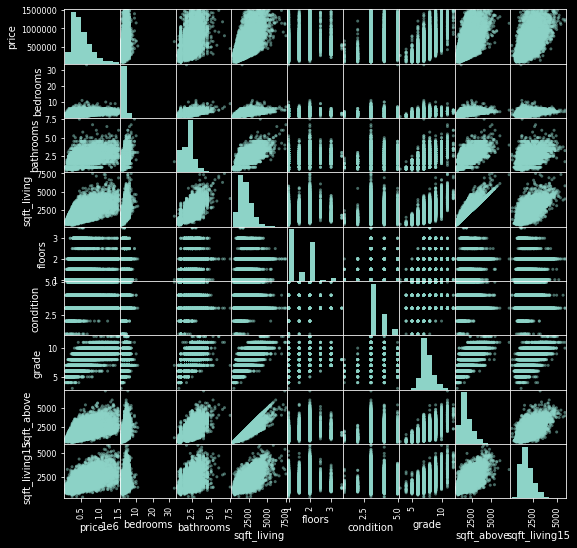

In [325]:
## Looking at relationship between remaining continuous variables 
pd.plotting.scatter_matrix(cont,figsize  = [9, 9]);
plt.show()

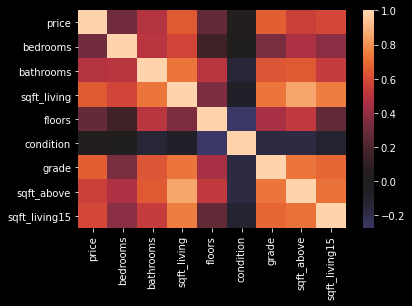

In [328]:
# Another view. shows sqft_living and sqft_above highly correlated which makes sense. 
sns.heatmap(cont.corr(), center=0);

In [330]:
# Viewing Correlation Between Each Variable ad Checking which variables have a correlation > 0.7 as this could suggest multicollinearity
cont_corr = cont_log.corr().abs().stack().reset_index()
cont_corr['preds'] = cont_corr['level_0']+' & '+cont_corr['level_1']
cont_corr = cont_corr.drop(['level_0','level_1'],axis = 1).rename(columns={0:'corr'}).sort_values(by='corr',ascending = False)
cont_corr.loc[(cont_corr['corr'] > 0.7) & (cont_corr['corr'] != 1)]

,corr,preds
66,0.854285,sqft_above_log & sqft_living_log
34,0.854285,sqft_living_log & sqft_above_log
29,0.746301,sqft_living_log & bathrooms_log
21,0.746301,bathrooms_log & sqft_living_log
35,0.731737,sqft_living_log & sqft_living15_log
75,0.731737,sqft_living15_log & sqft_living_log
33,0.718408,sqft_living_log & grade_log
57,0.718408,grade_log & sqft_living_log
69,0.715898,sqft_above_log & grade_log
61,0.715898,grade_log & sqft_above_log


In [331]:
## Looks like sqft_living is what is correlating with each predictor. Lets drop this. 
x_cont_log.drop('sqft_living_log',axis=1,inplace=True)

In [332]:
#Creating Final Dataset

In [347]:
final_preds = pd.concat([cat_dummies,cont_log.drop('price_log',axis=1)], axis = 1)

In [348]:
# df.groupby(by='zipcode').mean().sort_values(by='price',ascending=False)['price'].astype(int)

#### Running the model

In [349]:


predictors_int = sm.add_constant(final_preds)
model = sm.OLS(df['price'],predictors_int).fit()
model.summary() # Rs of 0.821

# predictors_int = sm.add_constant(final_preds.drop(['bedrooms_33','floors_3.5','grade_10','zipcode_98022'],axis=1))
# model = sm.OLS(df['price'],predictors_int).fit()
# model.summary() # Rs of 0.821

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1035.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:30:19   Log-Likelihood:            -2.6745e+05
No. Observations:               20557   AIC:                         5.351e+05
Df Residuals:                   20473   BIC:                         5.357e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -3.07e+06   2.89e+04   -106.199      0.000   -3.13e+06   -3.01e+06
view_1             6.775e+04   6485.894     10.445      0.000     5.5e+04    8.05e+04
view_2              7.88e+04   3927.533     20.064      0.000    7.11e+04    8.65e+04
view_3             1.489e+05   5521.643     26.958      0.000    1.38e+05     1.6e+05
view_4             2.685e+05   8027.132     33.447      0.000    2.53e+05    2.84e+05
zipcode_98002      2.595e+04   9667.403      2.685      0.007    7005.290    4.49e+04
zipcode_98003     -7599.3760   8758.107     -0.868      0.386   -2.48e+04    9567.213
zipcode_98004      5.811e+05   9629.462     60.343      0.000    5.62e+05       6e+05
zipcode_98005      3.393e+05   1.04e+04     32.600      0.000    3.19e+05     3.6e+05
zipcode_98006       2.98e+05   7828.962     38.058      0.000    2.83e+05    3.13e+05
zipcode_98007      2.625e+05   1.09e+04     24.095      0.000    2.41e+05    2.84e+05
zipcode_98008      2.449e+05   8811.730     27.792      0.000    2.28e+05    2.62e+05
zipcode_98010      1.059e+05   1.24e+04      8.544      0.000    8.16e+04     1.3e+05
zipcode_98011      1.378e+05   9768.699     14.105      0.000    1.19e+05    1.57e+05
zipcode_98014      1.423e+05   1.15e+04     12.361      0.000     1.2e+05    1.65e+05
zipcode_98019      1.038e+05   9818.379     10.570      0.000    8.45e+04    1.23e+05
zipcode_98022      1.066e+04   9281.046      1.149      0.251   -7528.987    2.89e+04
zipcode_98023     -2.123e+04   7611.398     -2.790      0.005   -3.62e+04   -6315.569
zipcode_98024       1.91e+05   1.39e+04     13.693      0.000    1.64e+05    2.18e+05
zipcode_98027      2.017e+05   8043.110     25.072      0.000    1.86e+05    2.17e+05
zipcode_98028      1.307e+05   8750.263     14.935      0.000    1.14e+05    1.48e+05
zipcode_98029      2.273e+05   8544.999     26.597      0.000    2.11e+05    2.44e+05
zipcode_98030       441.1047   8971.279      0.049      0.961   -1.71e+04     1.8e+04
zipcode_98031      1.105e+04   8826.308      1.252      0.210   -6246.271    2.84e+04
zipcode_98032      6381.4188   1.14e+04      0.559      0.576    -1.6e+04    2.87e+04
zipcode_98033      3.539e+05   7963.610     44.435      0.000    3.38e+05    3.69e+05
zipcode_98034      1.958e+05   7483.295     26.168      0.000    1.81e+05     2.1e+05
zipcode_98038      3.949e+04   7381.391      5.350      0.000     2.5e+04     5.4e+04
zipcode_98039       7.47e+05   2.86e+04     26.101      0.000    6.91e+05    8.03e+05
zipcode_98040      4.762e+05   9525.055     49.990      0.000    4.57e+05    4.95e+05
zipcode_98042      1.172e+04   7438.697      1.576      0.115   -2857.436    2.63e+04
zipcode_98045      1.178e+05   9409.211     12.518      0.000    9.93e+04    1.36e+05
zipcode_98052      2.554e+05   7430.732     34.373      0.000    2.41e+05

#### Assessing Best Fit Model

In [350]:
X = final_preds
y = df.price

In [351]:
# #from sklearn.datasets import make_friedman1
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# linreg = LinearRegression()
# selector = RFE(linreg, n_features_to_select=3)
# selector = selector.fit(predictors, data_fin['mpg'])

In [352]:
# Your code here
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=10)
selector = selector.fit(X, y)

In [353]:
selector.support_ 

array([False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False])

In [354]:
selector.ranking_

array([52, 50, 13,  1, 66, 72,  1,  5, 11, 15, 20, 45, 41, 36, 51, 70, 59,
       27, 26, 43, 24, 74, 69, 73,  4, 30, 64,  1,  1, 68, 42, 19, 18, 62,
       46, 63, 47, 44, 32, 29, 22, 16, 23, 58,  2,  8,  1, 37,  9, 39,  1,
        1,  6, 12,  7, 31,  1, 10, 28, 25, 33, 14, 17, 38, 54, 35, 40, 53,
       21, 55, 61, 65,  1, 67, 56, 60, 71,  3, 57, 48,  1, 49, 34])

In [355]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 318013.67552765  430346.9491493   625994.30262349  345297.71424027
  263330.68207645  255098.30101854  310370.6342214   247423.80617556
  216075.32515282 1050189.15886895]
-1641026.502408209


In [356]:
selected_columns = X.columns[selector.support_ ]

In [357]:
selected_columns

Index(['view_4', 'zipcode_98004', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98105', 'zipcode_98109', 'zipcode_98112', 'zipcode_98119',
       'zipcode_98199', 'grade_log'],
      dtype='object')